# Hands-on Lab: Working with Multiple Tables

### Objectives
After completing this lab, you will be able to:

- Write SQL queries that access more than one table.
- Compose queries that access multiple tables using a nested statement in the WHERE clause.
- Build queries with multiple tables in the FROM clause.
- Write Implicit Join queries with join criteria specified in the WHERE clause.
- Specify aliases for table names and qualify column names with table aliases.

In this lab, you will complete SQL practice problems that will provide hands-on experience with SQL queries that access multiple tables. You will be:

- Accessing Multiple Tables with Sub-Queries.
- Accessing Multiple Tables with Implicit Joins.
### Software used in this lab
In this lab, you will use MySQL. MySQL is a Relational Database Management System (RDBMS) designed to store, manipulate, and retrieve data efficiently.

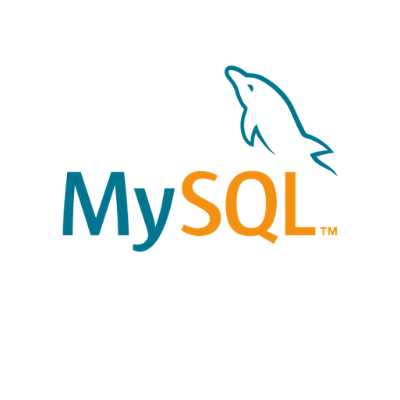

To complete this lab, you will utilize MySQL relational database service available as part of IBM Skills Network Labs (SN Labs) Cloud IDE. SN Labs is a virtual lab environment used in this course.

### Database used in this lab
The database used in this lab is internal. You will be working on a sample HR database. This HR database schema consists of 5 tables called **EMPLOYEES, JOB_HISTORY, JOBS, DEPARTMENTS** and **LOCATIONS**. Each table has a few rows of sample data. The following diagram shows the tables for the HR database:

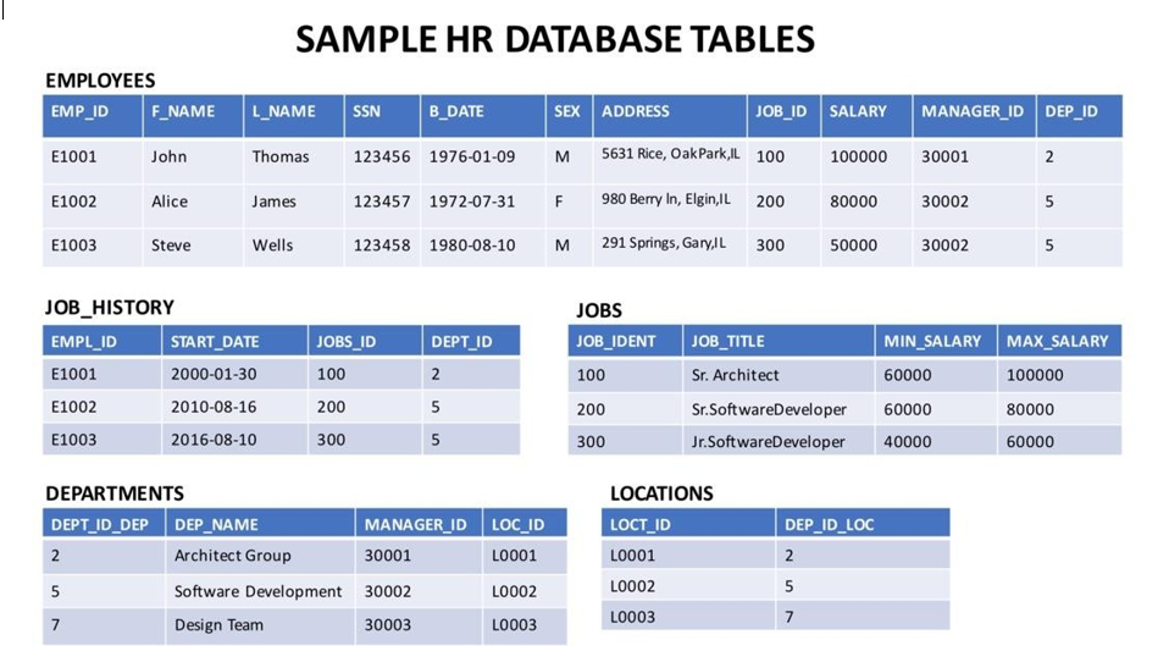

### Load the database
Using the skills acquired in the previous modules, you should first create the database in MySQL. Follow the steps below:

1. Open the phpMyAdmin interface from the Skills Network Toolbox in Cloud IDE.
2. Create a blank database named HR. Use the script shared in the link below to create the required tables.
    [Script_Create_Tables.sql](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/scripts/Script_Create_Tables.sql)

3. Download the files in the links below to your local machine (if not already done in previous labs).
    [Departments. csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Departments.csv)<br>
    [Jobs. csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Jobs.csv)<br>
    [JobsHistory.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/JobsHistory.csv)<br>
    [Locations. csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Locations.csv)<br>
    [Employees. csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Employees.csv)<br>

4. Use these files to the interface as data for respective tables in the HR database.

### Accessing multiple tables with sub-queries
Let us see some examples of queries requiring multiple table access using sub-queries.

1. Retrieve only the EMPLOYEES records corresponding to jobs in the JOBS table.

    For such a question, you can implement the sub-query in the WHERE clause, such that the overlapping column of JOD ID can identify the required entries.<br>
    `Query:` SELECT * FROM EMPLOYEES WHERE JOB_ID IN (SELECT JOB_IDENT FROM JOBS);

    The expected output would look as shown below.

    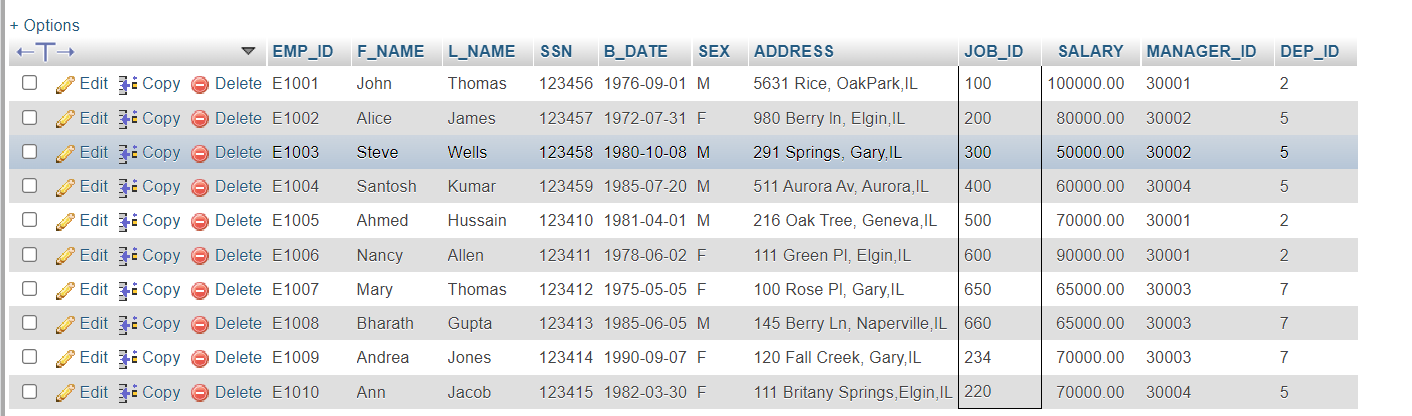

2. Retrieve JOB information for employees earning over $70,000.
   
   For this example, retrieve the details from the JOBS table, which has common IDs with those available in the EMPLOYEES table, provided the salary in the EMPLOYEES table is greater than $70,000. You can write the query as:<br>
   `Query:` SELECT JOB_TITLE, MIN_SALARY, MAX_SALARY, JOB_IDENT
    FROM JOBS
    WHERE JOB_IDENT IN (select JOB_ID from EMPLOYEES where SALARY > 70000 );

    The expected output would look as shown below.

    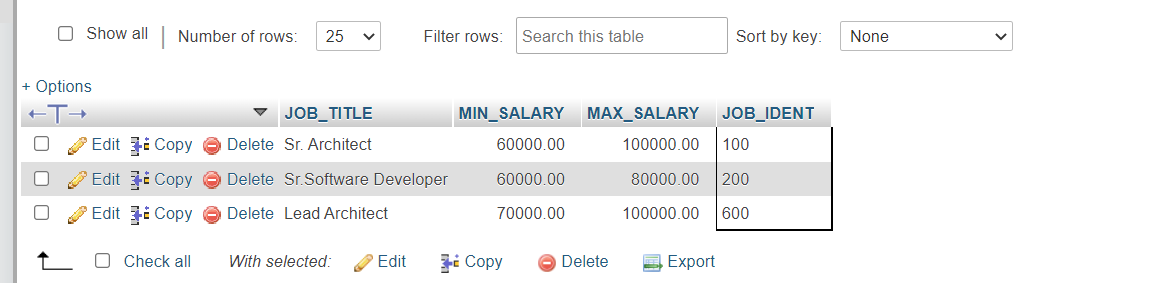



### Accessing multiple tables with Implicit Joins
Let us see some examples of queries that require access of multiple tables using Implicit Joins.

1. Retrieve only the EMPLOYEES records corresponding to jobs in the JOBS table.

    The same question as before, but now we will use Implicit Join to retrieve the required information. For this, you will combine the tables based on job IDs. Using the following query for this:<br>
    `Query:` SELECT *
    FROM EMPLOYEES, JOBS
    WHERE EMPLOYEES.JOB_ID = JOBS.JOB_IDENT;

    The expected output is shown below.

    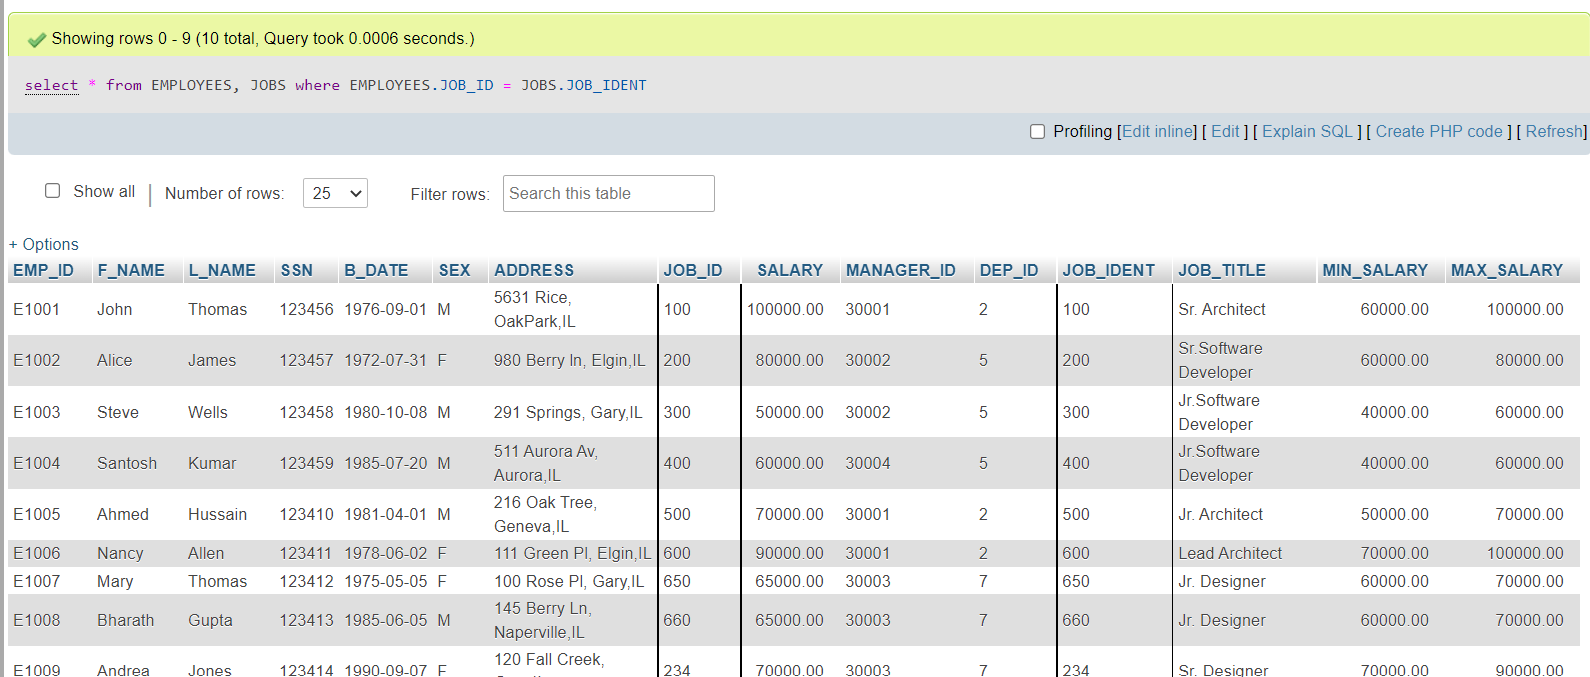

2. Redo the previous query using shorter aliases for table names.
    Note that the tables in question can be assigned shorter aliases. This is especially helpful in cases where specific columns are to be accessed from different tables. The query would be modified to:<br>
    `Query:` SELECT *
    FROM EMPLOYEES E, JOBS J
    WHERE E.JOB_ID = J.JOB_IDENT;

    The output would look like:

    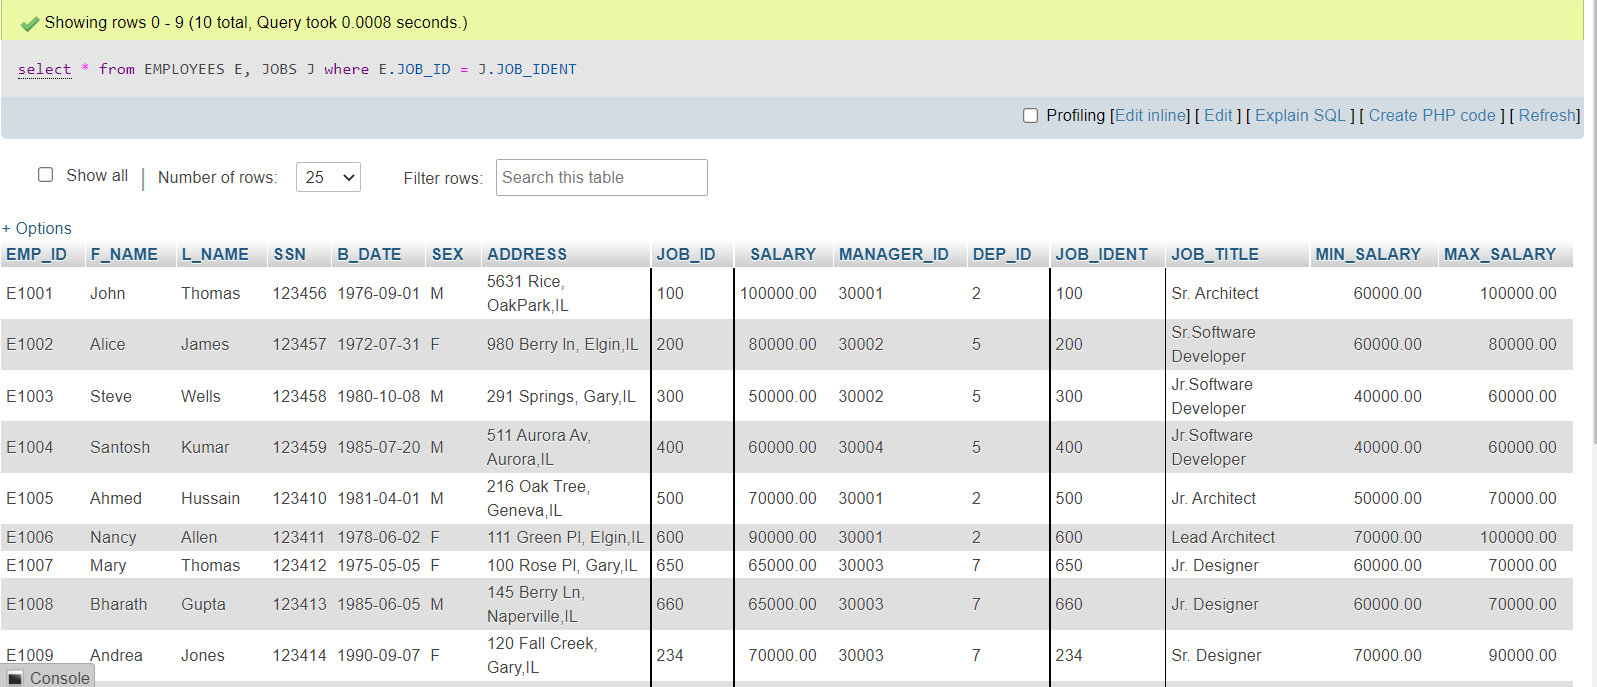

    Notice that the two queries are giving the same response.

3. In the previous query, retrieve only the Employee ID, Name, and Job Title.

    Notice that Job Title is a column of the JOBS table, and other details are coming from the EMPLOYEES table. The two tables will be joined on Job ID. The query would be as follows:<br>
    `Query:` SELECT EMP_ID,F_NAME,L_NAME, JOB_TITLE
    FROM EMPLOYEES E, JOBS J
    WHERE E.JOB_ID = J.JOB_IDENT;

    The output would look as shown below.

    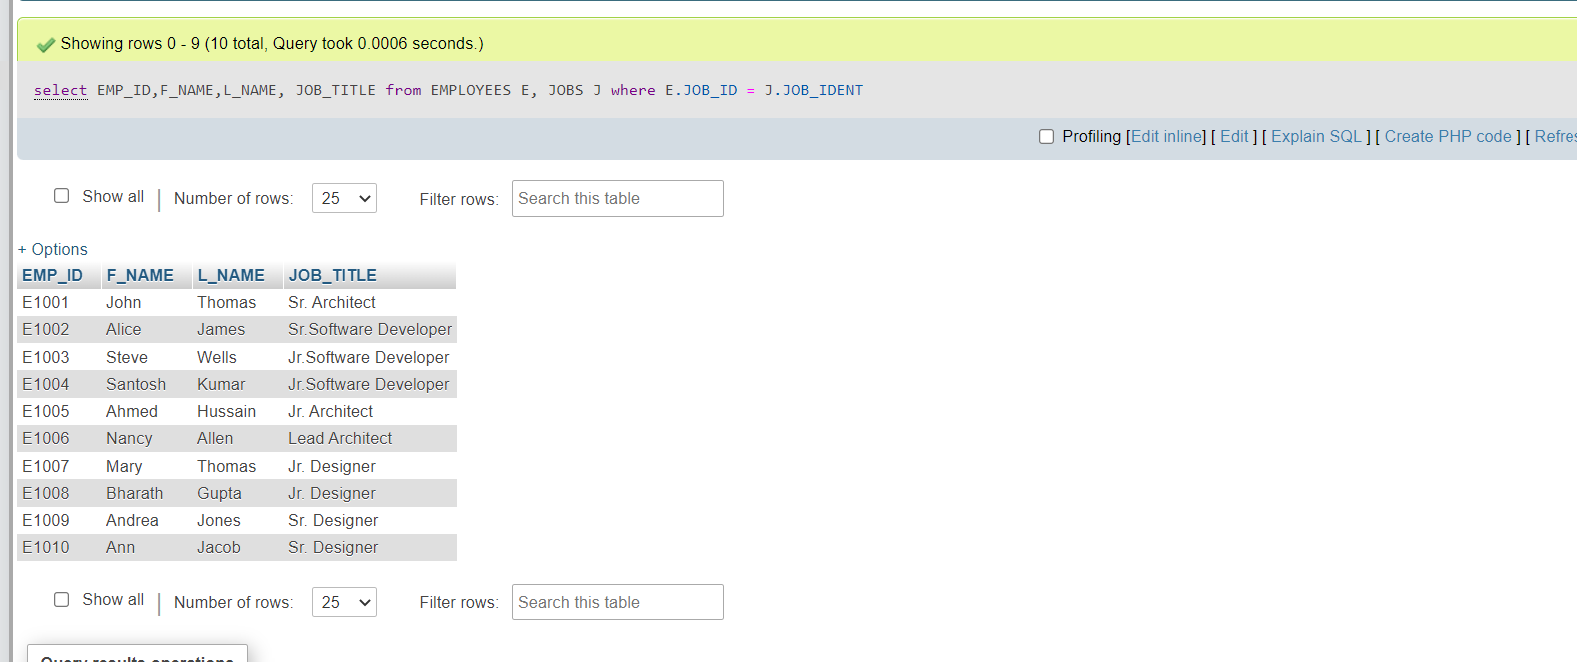

4. Redo the previous query, but specify the fully qualified column names with aliases in the SELECT clause.

    The column names can also be prefixed with table aliases to keep track of where each column is coming from. The above query will be modified as shown below.<br>

    `Query:` SELECT E.EMP_ID, E.F_NAME, E.L_NAME, J.JOB_TITLE
    FROM EMPLOYEES E, JOBS J
    WHERE E.JOB_ID = J.JOB_IDENT;

    The expected output is:

    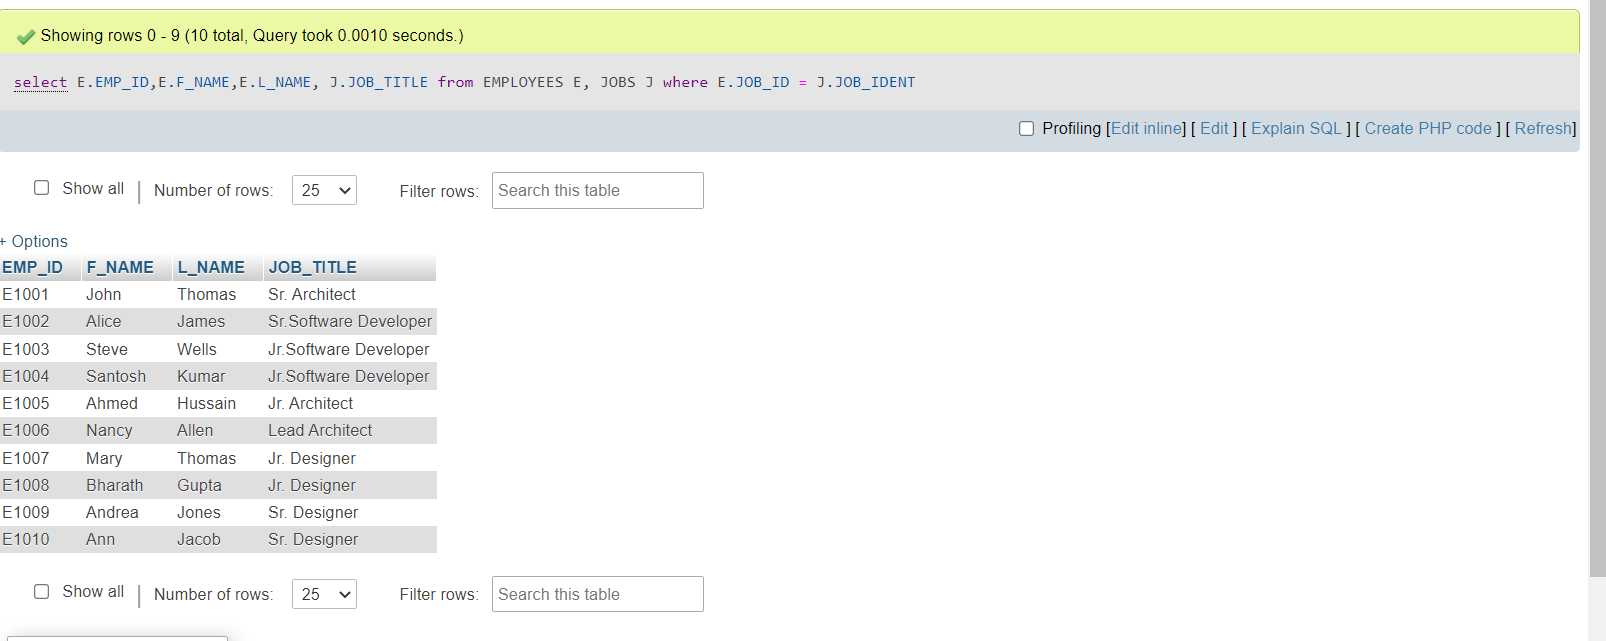

### Practice problems
1. Retrieve only the list of employees whose JOB_TITLE is Jr. Designer.
    a. Using sub-queries<br>
    `Query:` SELECT *
    FROM EMPLOYEES
    WHERE JOB_ID IN (SELECT JOB_IDENT
                    FROM JOBS
                    WHERE JOB_TITLE= 'Jr. Designer');

    b. Using Implicit Joins<br>
    `Query:` SELECT *
    FROM EMPLOYEES E, JOBS J
    WHERE E.JOB_ID = J.JOB_IDENT AND J.JOB_TITLE= 'Jr. Designer';

1. Retrieve JOB information and a list of employees whose birth year is after 1976.
    a. Using sub-queries<br>
    `Query:` SELECT JOB_TITLE, MIN_SALARY, MAX_SALARY, JOB_IDENT
    FROM JOBS
    WHERE JOB_IDENT IN (SELECT JOB_ID
                        FROM EMPLOYEES
                        WHERE YEAR(B_DATE)>1976 );

    b. Using implicit join<br>
    `Query:` SELECT J.JOB_TITLE, J.MIN_SALARY, J.MAX_SALARY, J.JOB_IDENT
    FROM JOBS J, EMPLOYEES E
    WHERE E.JOB_ID = J.JOB_IDENT AND YEAR(E.B_DATE)>1976;